# Orbital Chagnes - 03

In this excercise we will investigate how climate on Earth has changed in the past 3 million years.

We will use a simple climate model (twobox) to explore the chagnes in orbital insolation

### Change to the correct directory

First make sure you are in the correct directory 

e.g. cd ~/Document/GitHub/twobox

In [1]:
pwd

'/Users/kerim/Documents/GitHub/twobox'

### Introduction to the twobox climate model

The twobox model is a simple climate model simulating the impact of radiative forcing on the Earth's energy balance, including the impact of greenhouse gases, volcanic activity and changes in solar radiation.

The model consists of two boxes; one representing the top ocean mixed layer and one box for the deeper ocean.

<img src="images/2D_model_schematic.png">

There is a balance between the radiation entering and leaving the top of the atmosphere (TOA). This is represented by the flux of energy between the atmosphere and the ocean mixed layer ocean ($\Delta Q$).  The model also accounts for the fluxes of energy entering the deeper ocean ($\gamma$).

The computation of the changes in temperature in the twobox climate model is based on the radiative balance as follows (and included in the Python file `twoboks.py`):

$$\begin{align}
c_{mix}\dfrac{d\Delta T_s}{dt}&=\Delta Q-\lambda \Delta T_s -\gamma (\Delta T_s -\Delta T_0)     \qquad   (\mathit{1}) \\
c_{deep}\dfrac{d\Delta T_o}{dt}&=\gamma (\Delta T_s - \Delta T_o)  \qquad   (\mathit{2}) 
\end{align}$$

where $c_{mix}$ and $c_{deep}$ is the heat capacity of the ocean mixed layer and deeper ocean, respectively. $\Delta T_s$ gives the changes in surface temperature, while $\Delta T_o$ gives the temperature in the deeper ocean. $\lambda$ represents the *climate feedbaks*, and $\gamma$ represents the heat uptake by the deeper ocean.

In [17]:
# Import relevant python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Include this line if you want to open this file in Jupyter Notebook to make interactive plots
%matplotlib inline 

# Imports the function calculating the temperature changes 
from twobox import calculate_temp_anomalies 

### Setting up the twobox model
To apply the twobox model we must first load the radiative forcing data and calculate the total radiative forcing ($\Delta$Q). Next we must decide which *climate feedbacks* ($\lambda$) to include, and specify the strength of the *heat uptake by the deeper ocean* ($\gamma$).

## 1. Radiative forcing

Here we use historical data for the radiative forcing covering the period 1750 to 2011. The data are taken from the latest IPCC report (for more info see AR6 Chapter 7: https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf)

We consider the following *radiative forcing*:

- greenhouse gases 
- solar radiation
- volcanism
- land use changes 
- aerosols (man-made)

The total radiative forcing ($\Delta$Q) is given by:

$$\begin{align}
\Delta Q=\Delta Q_{GHG} + \Delta Q_{solar} + \Delta Q_{volcanos} + \Delta Q_{landuse} + \Delta Q_{aerosols} 
\end{align}$$


In [18]:
# read the historical forcing from the file 'historical_IPCC6.csv' and store it in variable "df"
df=pd.read_csv('forcing_files/historical_IPCC6.csv',index_col = 0,sep=';',encoding = "utf-8")

## 2. Combined radiate forcing
Using the code below we will create a new variable including the combined radiate forcing

First - define switches for radiative forcing

In [19]:
# These switches come in handy later for investigating the impact of individual radiative forcings
switch_ghg   = 1  # Greenhouse gas forcing on=1 off=0
switch_solar = 1  # Solar forcing on=1 off=0
switch_volc  = 1  # Volcanic forcing on=1 off=0
switch_land  = 1  # Landuse forcing on=1 off=0
switch_aero  = 1  # Pollution particle forcing on=1 off=0

<function matplotlib.pyplot.legend(*args, **kwargs)>

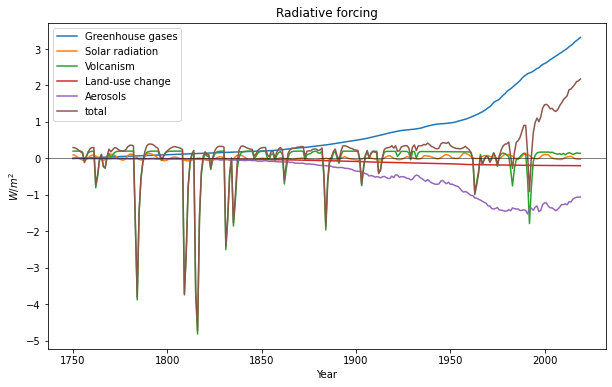

In [20]:
# Calculate and plot the combined radiative forcing (by adding the variable 'total' to the array 'df')
#df['total'] = switch_ghg*df['Greenhouse gases']+switch_solar*df['Solar radiation']+switch_volc*df['Volcanism']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']
df['total'] = switch_ghg*df['Greenhouse gases']+switch_solar*df['Solar radiation'] \
  +switch_volc*df['Volcanism']+switch_land*df['Land-use change']+switch_aero*df['Aerosols']

# plot
df.plot(title="Radiative forcing",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)
plt.legend

## 3. Include Climate Feedbacks and Deep Ocean Heat Uptake

To run the twobox models we use the following values for feedback factors $\lambda$ taken from the last IPCC report AR6 as given in the table below (based on 14 different climate models).

Climate feedbacks are the focus of the next python excercise - however, please feel free to experiment with the values given. 

<img src="images/table_lambda_values.png" style="width:70%">

In [21]:
# Set lambda values based on Soden and Held (2006)
lambda_planck = -3.21    # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]
lambda_lapse  = -0.84    # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]
lambda_water  = 1.8      # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]
lambda_cloud  = 0.69     # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]
lambda_albedo = 0.26     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]
lambda_other  = 0.0      # Other feedbacks [Wm-2K-1]

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

### Ocean heat uptake

 The efficiency of deep ocean heat uptake is set to
$\gamma = -0.69 Wm^{-2}K^{-1}$ following *Dufresne and Bony* (2008).

In [22]:
# Deep ocean heat uptake efficency [Wm-2K-1] from Dufresne and Bony (2008).
gamma = -0.69  # best guess [-1 to -0.5]

### Calculate temperature changes including climate feedbacks and deep ocean heat uptake

Repeat the calculation of historical temperature changes using the twobox model including the values choosen for the impact of climate feedbacks as well as the deep ocean heat uptake.

In [23]:
# Calls the function "calculate_temp_anomalies" which calculates the temperature evolution
# including climate feedbakcs ('lambda_sum') and deep ocean heat uptatek ('gamma')
Ts, To = calculate_temp_anomalies(df['total'].to_numpy(), lambda_sum, gamma) 

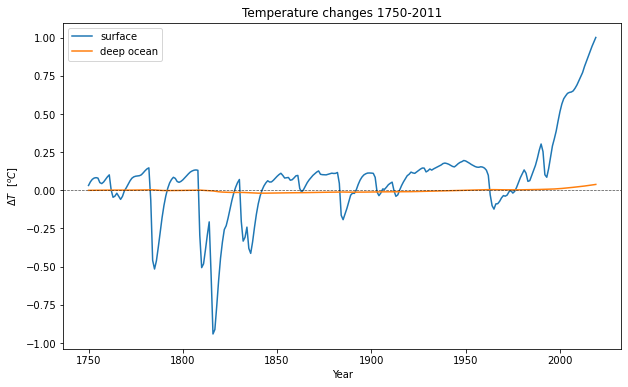

In [24]:
# Make a new array with the same indexes (i.e. years) as the climate forcing
temp = pd.DataFrame(index=df.index) 
temp['surface']=Ts
temp['deep ocean']=To
temp.plot(ylabel="$\Delta T$  $[^oC]$", title="Temperature changes 1750-2011", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

## 4. Temperature changes associated to the radiative forcing
Here is an example calculating the temperature changes for each of the different climate forcing. This makes it possible to study e.g. the isolated impact of solar radiation.

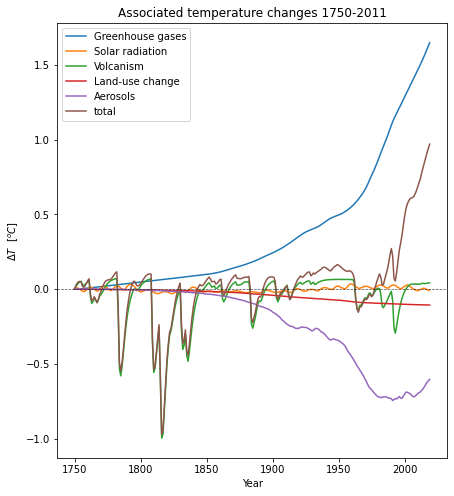

In [25]:
# makes a new array with indexes (years) as for the climate forcing 
temp = pd.DataFrame(index=df.index) 

temp['Greenhouse gases'], To = calculate_temp_anomalies(df['Greenhouse gases'].to_numpy(), lambda_sum, gamma)
temp['Solar radiation'], To = calculate_temp_anomalies(df['Solar radiation'].to_numpy(), lambda_sum, gamma)
temp['Volcanism'], To = calculate_temp_anomalies(df['Volcanism'].to_numpy(), lambda_sum, gamma)
temp['Land-use change'], To = calculate_temp_anomalies(df['Land-use change'].to_numpy(), lambda_sum, gamma)
temp['Aerosols'], To = calculate_temp_anomalies(df['Aerosols'].to_numpy(), lambda_sum, gamma)
temp['total'], To = calculate_temp_anomalies(df['total'].to_numpy(), lambda_sum, gamma)

# Calculate and plot changes relative to the year 1750
Tanom1750 = temp - temp.loc[1750]

Tanom1750.plot(ylabel="$\Delta T$  $[^oC]$", title="Associated temperature changes 1750-2011", figsize=(7,8))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

## 5. Orbital changes to solar radiation

Load solar insolation forcing time series.

In [28]:
# Load txt files of the orbital forcing and lr04 global benthic 180 stack
ins_i400W_65N = np.loadtxt('orbital/ins_i400W_65N.txt') # integrated summer insolation?
ins_june21_65N = np.loadtxt('orbital/ins_june21_65N.txt')
ins_june21_25N = np.loadtxt('orbital/ins_june21_25N.txt')
lr04 = np.loadtxt('orbital/lr04.txt')

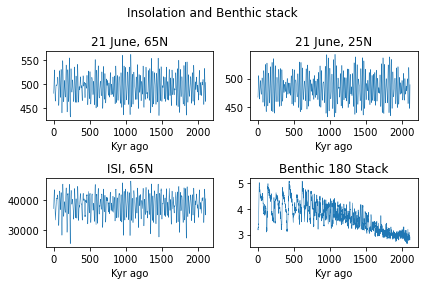

In [29]:
# Plot the insolation and benthic 180 data
fig, ax = plt.subplots(2,2)
fig.suptitle("Insolation and Benthic stack")

ax[0,0].plot(ins_june21_65N, linewidth=0.5)
ax[0,0].set_title("21 June, 65N")
ax[0,0].set_xlabel("Kyr ago")
ax[0,1].plot(ins_june21_25N, linewidth=0.5)
ax[0,1].set_title("21 June, 25N")
ax[0,1].set_xlabel("Kyr ago")
ax[1,0].plot(ins_i400W_65N, linewidth=0.5)
ax[1,0].set_title("ISI, 65N")
ax[1,0].set_xlabel("Kyr ago")
ax[1,1].plot(lr04, linewidth=0.5)
ax[1,1].set_title("Benthic 180 Stack")
ax[1,1].set_xlabel("Kyr ago")
plt.tight_layout()

Differences in forcing relative to present day

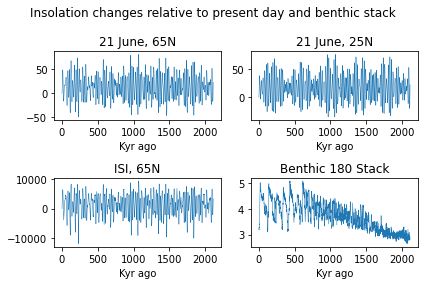

In [30]:
# Difference in radiative forcing relative to present day
ins_i400W_65N_relative = ins_i400W_65N - ins_i400W_65N[0]
ins_june21_65N_relative = ins_june21_65N - ins_june21_65N[0]
ins_june21_25N_relative = ins_june21_25N - ins_june21_25N[0]

# Plot the data.
fig, ax = plt.subplots(2,2)
fig.suptitle("Insolation changes relative to present day and benthic stack")
ax[0,0].plot(ins_june21_65N_relative, linewidth=0.5)
ax[0,0].set_title("21 June, 65N")
ax[0,0].set_xlabel("Kyr ago")
ax[0,1].plot(ins_june21_25N_relative, linewidth=0.5)
ax[0,1].set_title("21 June, 25N")
ax[0,1].set_xlabel("Kyr ago")
ax[1,0].plot(ins_i400W_65N_relative, linewidth=0.5)
ax[1,0].set_title("ISI, 65N")
ax[1,0].set_xlabel("Kyr ago")
ax[1,1].plot(lr04, linewidth=0.5)
ax[1,1].set_title("Benthic 180 Stack")
ax[1,1].set_xlabel("Kyr ago")
plt.tight_layout()

Force the model with relative changes in insolation at 65 N (comapared with present day).

In [31]:
Ts, To = calculate_temp_anomalies(ins_june21_65N_relative, lambda_sum, gamma)

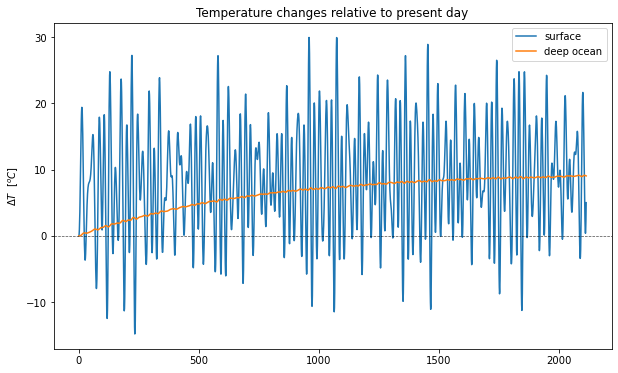

In [32]:
#Plot the temperature change relative to present.
temp = pd.DataFrame() 
temp['surface']=Ts
temp['deep ocean']=To
temp.plot(ylabel="$\Delta T$  $[^oC]$", title="Temperature changes relative to present day", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')